# Instalacion e importacion de librerias

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [4]:
!pip install tensorflow

  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl (385.0 MB)



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\VICTUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Definicion de entradas y salidas para que las neuronas aprendan

In [3]:
celsius = np.array ([-40, -10, 0, 8 , 15, 22, 38], dtype = float)
fahrenheit = np.array ([-40, 14, 32, 46, 59, 72, 100], dtype=float)

# Creando la red neuronal de una sola capa

Keras nos permite modelar la red neuronal de manera simple

### Capa de tipo densa

- Las capas densas son las que tienen conexiones de cada neurona hacia todas las neuronas de la siguiente capa

In [4]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1]) 
#units = unidades de la capa
#input_shape=[1] --> neuronas de la capa (1 entrada con una neurona)

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Modelo de red neuronal

In [5]:
modelo = tf.keras.Sequential([capa])
#le inidcamos la capa creada

#  Preparacion de la red, compilacion (1 capa)

Utilizaremos dos propiedades
- OPTIMIZADOR --> se utiliza un optimizador llamado ADAM (le permite a la red saber como ajustar los pesos y sesgos de manera eficiente para que aprenda y no desaprenda)
- FUNCION DE PERDIDA


In [6]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1), #al optimizador le inidcamos un valor numerico que es la taza de aprendizaje --> que tanto ajustamos los pesos y sesgos
    loss = 'mean_squared_error' #error cuadratico medio  (una poca cantidad de errores grandes es peor que una gran cantidad de errores pequenios)
)
    

# Entrenamiento (1 capa)

In [7]:
print ('Comenzando entrenamiento...')
historial = modelo.fit (celsius, fahrenheit, epochs = 1000, verbose=False)
#epochs es la cantidad de vueltas que queremos que intente, para que la red se optimice lo mas posible
#verboze = false (para que no imprima muchas cosas al estar entrenando)
print ('Modelo entrenado!')

### Resultado de la funcion de perdida

- Nos dice que tan mal estan los resultados de la red en cada vuelta

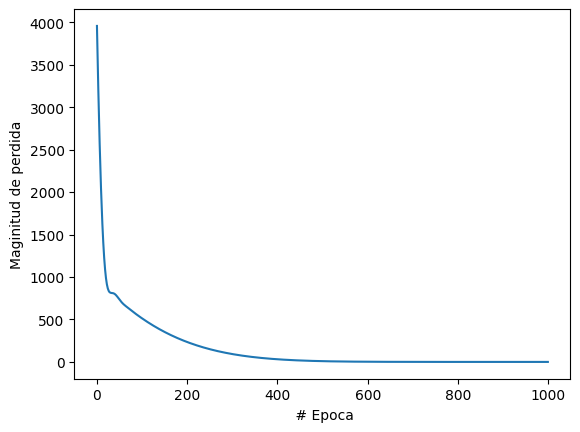

In [11]:
plt.xlabel(" # Epoca")
plt.ylabel('Maginitud de perdida')
plt.plot (historial.history['loss'])

Vemos que a medida que fue haciendo mas intentos, los errores fueron disminuyendo

# Prediccion de la red de una sola capa

Haremos la prediccion de un dato que no esta con nuestros datos de entrada

In [14]:
print (' 100 grados CELSIUS = ?? grados FAHRENHEIT')
resultado = modelo.predict(np.array([100]))
print('El resultado es ' + str(resultado[0][0]) + "fahrenheit")

 100 grados CELSIUS = ?? grados FAHRENHEIT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
El resultado es 211.74266fahrenheit


- 100 grados CELSIUS = 212 grados FAHRENHEIT
- 100 grados CELSIUS = 211.75 grados FAHRENHEIT
- El resultado fue bastante correcto!

# Estructura interna de la red

Variables internas del modelo

In [15]:
print (capa.get_weights())

[array([[1.7982348]], dtype=float32), array([31.919176], dtype=float32)]


- El peso lo asigno a 1.79
- El sesgo lo asigno a 31.89
-  La cuenta que hizo la red fue= 100 * 1.79 + 31.9

# Creando una red neuronal de varias capas

In [16]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida= tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential ([oculta1,oculta2, salida])

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Preparacion y entrenamiento de algoritmo de varias capas

- Se hace igual que con una sola capa

PREPARACION

In [17]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1), #al optimizador le inidcamos un valor numerico que es la taza de aprendizaje --> que tanto ajustamos los pesos y sesgos
    loss = 'mean_squared_error' #error cuadratico medio  (una poca cantidad de errores grandes es peor que una gran cantidad de errores pequenios)
)

ENTRENAMIENTO

In [18]:
print ('Comenzando entrenamiento...')
historial = modelo.fit (celsius, fahrenheit, epochs = 1000, verbose=False)
#epochs es la cantidad de vueltas que queremos que intente, para que la red se optimice lo mas posible
#verboze = false (para que no imprima muchas cosas al estar entrenando)
print ('Modelo entrenado!')

Comenzando entrenamiento...
Modelo entrenado!


Podemos darnos cuenta que tarda mucho mas en entrenar

RESULTADO DE LA FUNCION DE PERDIDA

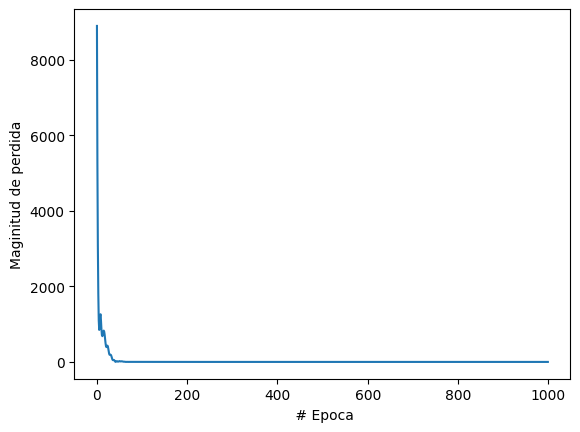

In [19]:
plt.xlabel(" # Epoca")
plt.ylabel('Maginitud de perdida')
plt.plot (historial.history['loss'])

Se observa en el grafico que el aprendizaje fue mucho mas rapido, ya que desde la epoca 50 no aprendio nada mas
- A medida que la red es mas compleja, nos da mejores resultados mas rapido

# Prediccion de la red neuronal de varias capas

In [20]:
print (' 100 grados CELSIUS = ?? grados FAHRENHEIT')
resultado = modelo.predict(np.array([100]))
print('El resultado es ' + str(resultado[0][0]) + "fahrenheit")

 100 grados CELSIUS = ?? grados FAHRENHEIT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
El resultado es 211.74744fahrenheit


El resultado es bastante correcto ya que 212 =aprox 211.75 

# Estructura interna de la red de varias capas

PESOS Y SESGOS

In [23]:
print (oculta1.get_weights())
print (oculta2.get_weights())
print (salida.get_weights())

[array([[-0.4879996 ,  0.28235286, -0.32539982]], dtype=float32), array([-3.919738 , -0.8152959, -3.3127165], dtype=float32)]
[array([[ 1.4822327 , -0.6908848 ,  0.525231  ],
       [ 0.29204628, -0.34781492,  0.62286466],
       [ 0.4711982 , -1.5952914 ,  0.2884072 ]], dtype=float32), array([-2.6081991,  3.897256 , -2.4264054], dtype=float32)]
[array([[-0.5483068],
       [ 1.7284212],
       [-0.299793 ]], dtype=float32), array([3.5258512], dtype=float32)]


Estos resultados dan lugar a las mejores combinaciones que encontro la red para llegar a dar resultados de manera adecuada